**Tasks**:

1. Data Import and Cleaning:

2. Import the dataset using Pandas.

3. Clean and preprocess the data, addressing missing values and categorizing data as needed.
4. Convert dates and other relevant fields to appropriate formats.

5. Exploratory Data Analysis:

6. Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.

7. Analyze the frequency of crashes over time to identify any trends.

8. Statistical Analysis:

9. Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.

10. Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).

11. Visualization:

12. Create charts and graphs using Matplotlib and Seaborn to visualize the findings from your exploratory data analysis and statistical tests.

13. Examples might include time series plots of crashes over years, bar charts of crashes by region, and histograms of fatalities.

14. Insight and Report:

15. Summarize your findings and provide insights into the patterns or anomalies discovered in the data.

16. Prepare a well-structured report including all code, visualizations, and interpretations.

#Kaggle connection

In [74]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [75]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [76]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [77]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [78]:
!kaggle datasets download -d nayansubedi1/airplane-crashes-and-fatalities-upto-2023

Dataset URL: https://www.kaggle.com/datasets/nayansubedi1/airplane-crashes-and-fatalities-upto-2023
License(s): DbCL-1.0
airplane-crashes-and-fatalities-upto-2023.zip: Skipping, found more recently modified local copy (use --force to force download)


In [79]:
! unzip airplane-crashes-and-fatalities-upto-2023.zip

Archive:  airplane-crashes-and-fatalities-upto-2023.zip
replace Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv  


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin 1')
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [82]:
df.dropna(subset=['Location', 'Aboard', 'Aboard Passangers', 'Aboard Crew', 'Fatalities', 'Fatalities Passangers', 'Fatalities Crew'], axis=0, inplace=True)

In [83]:
df.drop(df.loc[df['Aboard Crew'] < df['Fatalities Crew']].index, axis=0, inplace=True)
df.drop(df.loc[df['Aboard Passangers'] < df['Fatalities Passangers']].index, axis=0, inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4739 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4739 non-null   object 
 1   Time                   3412 non-null   object 
 2   Location               4739 non-null   object 
 3   Operator               4732 non-null   object 
 4   Flight #               1319 non-null   object 
 5   Route                  4139 non-null   object 
 6   AC Type                4734 non-null   object 
 7   Registration           4567 non-null   object 
 8   cn/ln                  4229 non-null   object 
 9   Aboard                 4739 non-null   float64
 10  Aboard Passangers      4739 non-null   float64
 11  Aboard Crew            4739 non-null   float64
 12  Fatalities             4739 non-null   float64
 13  Fatalities Passangers  4739 non-null   float64
 14  Fatalities Crew        4739 non-null   float64
 15  Ground   

In [85]:
df['Time'].fillna('00:00', inplace=True)

In [86]:
def time_format(time):
  time_split = time.split(':')
  hour = int(time_split[0])
  minute = int(time_split[1])
  if hour >= 24:
    time_split[0] = '00'
  if minute > 60:
    time_split[1] = '00'
  return ':'.join(time_split)

def date_format(date):
  date_split = date.split('/')
  day = int(date_split[0])
  month = int(date_split[1])
  year = int(date_split[2])
  if len(day) < 2:
    date_split[0] = '0'+day
  if len(month) < 2:
    date_split[1] = '0'+month
  return '/'.join(date_split)

df['Time'] = df['Time'].apply(time_format)

In [87]:
df['Date'] = pd.to_datetime(df['Date']+' '+df['Time'], format='mixed')

In [88]:
df['Date'] = pd.to_datetime(df['Date'])

In [89]:
df.drop(['Time'], axis=1, inplace=True)

In [90]:
df['Year'] = df['Date'].dt.year
df['Decade'] = (df['Year'] // 10) * 10

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4739 entries, 0 to 4997
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4739 non-null   datetime64[ns]
 1   Location               4739 non-null   object        
 2   Operator               4732 non-null   object        
 3   Flight #               1319 non-null   object        
 4   Route                  4139 non-null   object        
 5   AC Type                4734 non-null   object        
 6   Registration           4567 non-null   object        
 7   cn/ln                  4229 non-null   object        
 8   Aboard                 4739 non-null   float64       
 9   Aboard Passangers      4739 non-null   float64       
 10  Aboard Crew            4739 non-null   float64       
 11  Fatalities             4739 non-null   float64       
 12  Fatalities Passangers  4739 non-null   float64       
 13  Fataliti

Mean: 42.693693693693696
Median: 49.0
Standard Deviation: 21.95482667693859


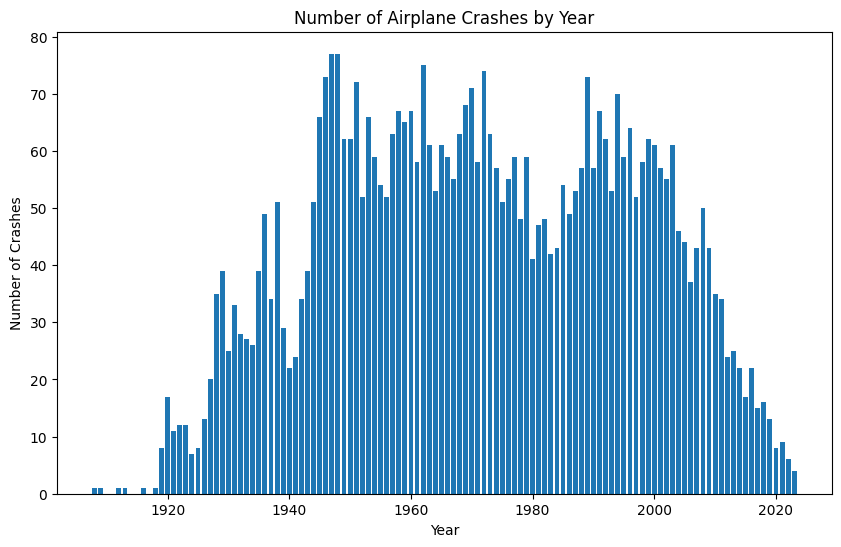

In [92]:
crashes_by_year = df['Date'].dt.year.value_counts().sort_index()
print(f'Mean: {crashes_by_year.mean()}')
print(f'Median: {crashes_by_year.median()}')
print(f'Standard Deviation: {crashes_by_year.std()}')

plt.figure(figsize=(10, 6))
plt.bar(crashes_by_year.index, crashes_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Number of Airplane Crashes by Year')
plt.show()

Mean: 965.0990990990991
Median: 1084.0
Standard Deviation: 707.620249401342


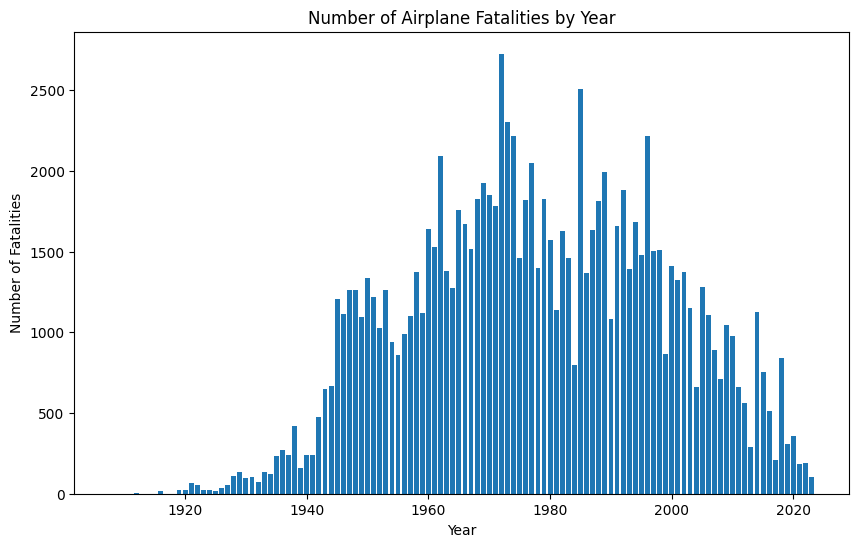

In [93]:
fatalities_by_year = df.groupby(df['Date'].dt.year)['Fatalities'].sum()
print(f'Mean: {fatalities_by_year.mean()}')
print(f'Median: {fatalities_by_year.median()}')
print(f'Standard Deviation: {fatalities_by_year.std()}')

plt.figure(figsize=(10, 6))
plt.bar(fatalities_by_year.index, fatalities_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.title('Number of Airplane Fatalities by Year')
plt.show()

Mean: 0.18238914749786458
Median: 0.0


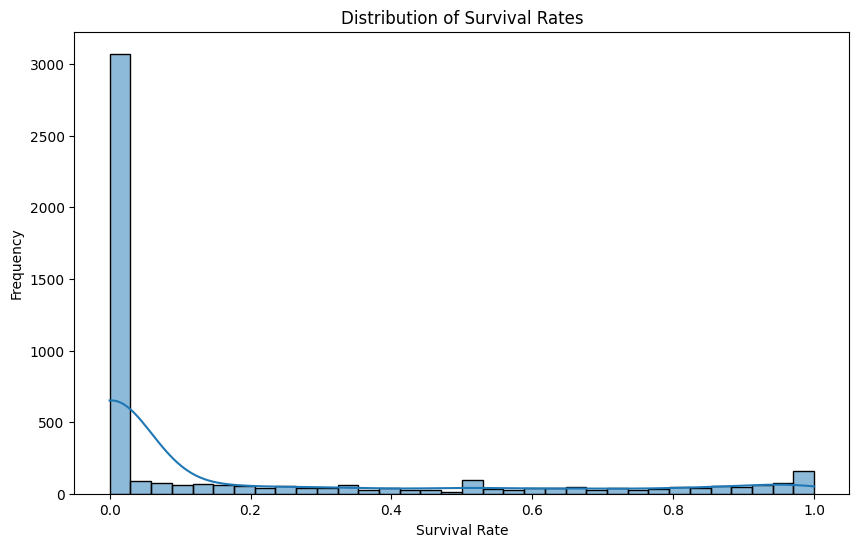

In [94]:
survival_rate = ((df['Aboard'] - df['Fatalities']) / df['Aboard']).fillna(0)
print(f'Mean: {survival_rate.mean()}')
print(f'Median: {survival_rate.median()}')

plt.figure(figsize=(10, 6))
sns.histplot(survival_rate, kde=True)
plt.xlabel('Survival Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Survival Rates')
plt.show()

Mean: 0.16642136064292612
Median: 0.0


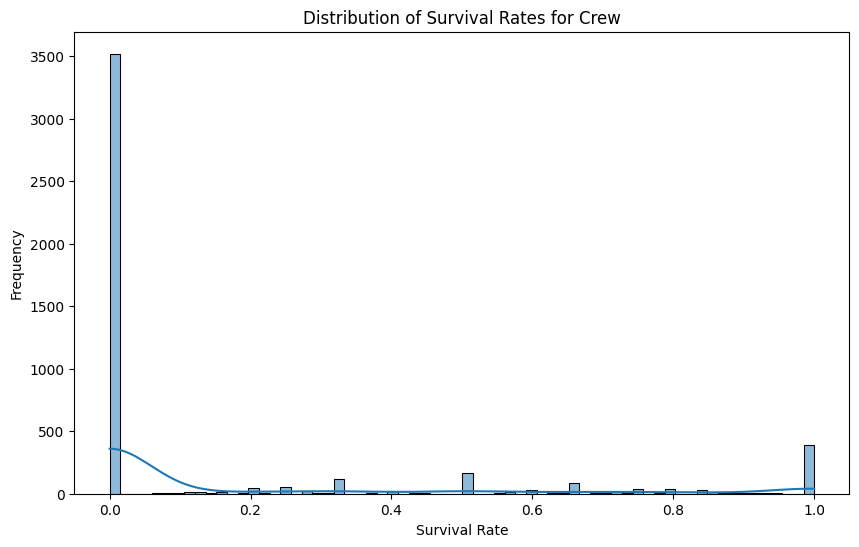

In [95]:
survival_crew_rate = ((df['Aboard Crew'] - df['Fatalities Crew']) / df['Aboard Crew']).fillna(0)
print(f'Mean: {survival_crew_rate.mean()}')
print(f'Median: {survival_crew_rate.median()}')

plt.figure(figsize=(10, 6))
sns.histplot(survival_crew_rate, kde=True)
plt.xlabel('Survival Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Survival Rates for Crew')
plt.show()

Mean: 0.16920126115671624
Median: 0.0


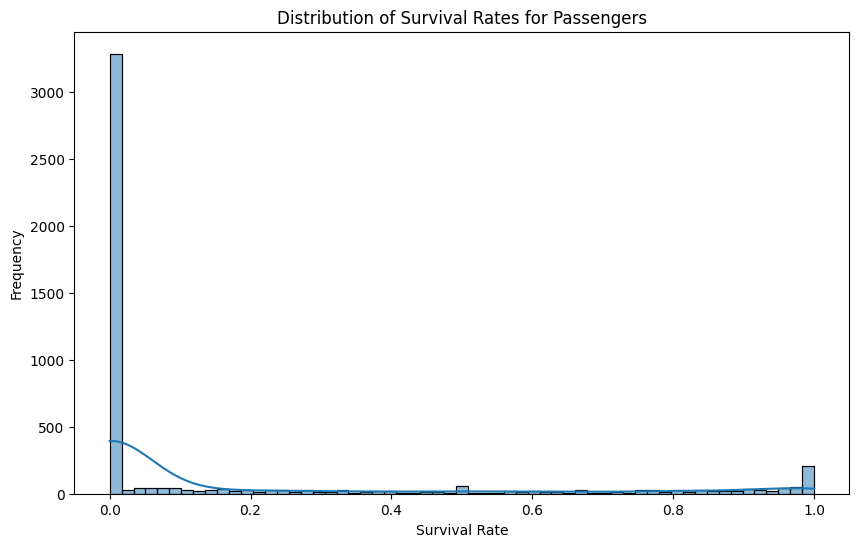

In [96]:
survival_passenger_rate = ((df['Aboard Passangers'] - df['Fatalities Passangers']) / df['Aboard Passangers']).fillna(0)
print(f'Mean: {survival_passenger_rate.mean()}')
print(f'Median: {survival_passenger_rate.median()}')

plt.figure(figsize=(10, 6))
sns.histplot(survival_passenger_rate, kde=True)
plt.xlabel('Survival Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Survival Rates for Passengers')
plt.show()

<Axes: xlabel='Date', ylabel='count'>

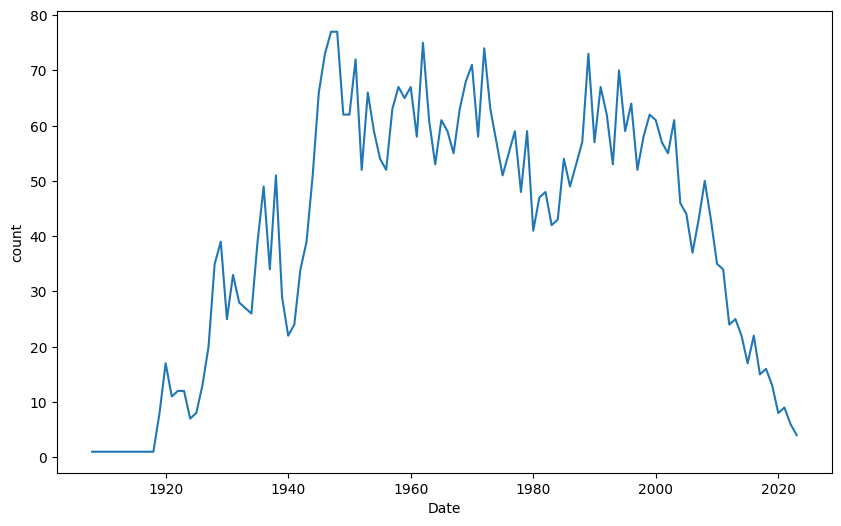

In [97]:
plt.figure(figsize=(10, 6))
sns.lineplot(crashes_by_year)

## Hypothesis Test

In [98]:
import scipy.stats as stats

#H0 The means of survivals rate in 2000s and 2010s are equal.
#H1 The means of survivals rate in 2000s and 2010s are not equal.

sample1 = df.loc[df['Decade'] == 1990]
sample2 = df.loc[df['Decade'] == 2000]
sample3 = df.loc[df['Decade'] == 2010]
survivors_passenger_rate_1990 = ((sample1['Aboard Passangers'] - sample1['Fatalities Passangers']) / sample1['Aboard Passangers']).fillna(0)
survivors_passenger_rate_2000 = ((sample2['Aboard Passangers'] - sample2['Fatalities Passangers']) / sample2['Aboard Passangers']).fillna(0)
survivors_passenger_rate_2010 = ((sample3['Aboard Passangers'] - sample3['Fatalities Passangers']) / sample3['Aboard Passangers']).fillna(0)

a = 0.05
t_statistic, p_value = stats.ttest_ind(survivors_passenger_rate_1990, survivors_passenger_rate_2000)
if p_value < a:
  print(f'There are no statistically significant differences between the survival rates in 1990 and 2000.')
else:
  print(f'There are statistically significant differences between the survival rates in 1990 and 2000.')
  print(f't-statistic: {t_statistic}')
  print(f'p-value: {p_value}')

t_statistic, p_value = stats.ttest_ind(survivors_passenger_rate_2000, survivors_passenger_rate_2010)
if p_value < a:
  print(f'There are no statistically significant differences between the survival rates in 2000 and 2010.')
else:
  print(f'There are statistically significant differences between the survival rates in 2000 and 2010.')
  print(f't-statistic: {t_statistic}')
  print(f'p-value: {p_value}')

There are statistically significant differences between the survival rates in 1990 and 2000.
t-statistic: 1.3660544699524122
p-value: 0.1722013302404025
There are statistically significant differences between the survival rates in 2000 and 2010.
t-statistic: 1.0117642781370568
p-value: 0.31199160148479216


<Axes: xlabel='Decade', ylabel='Fatalities'>

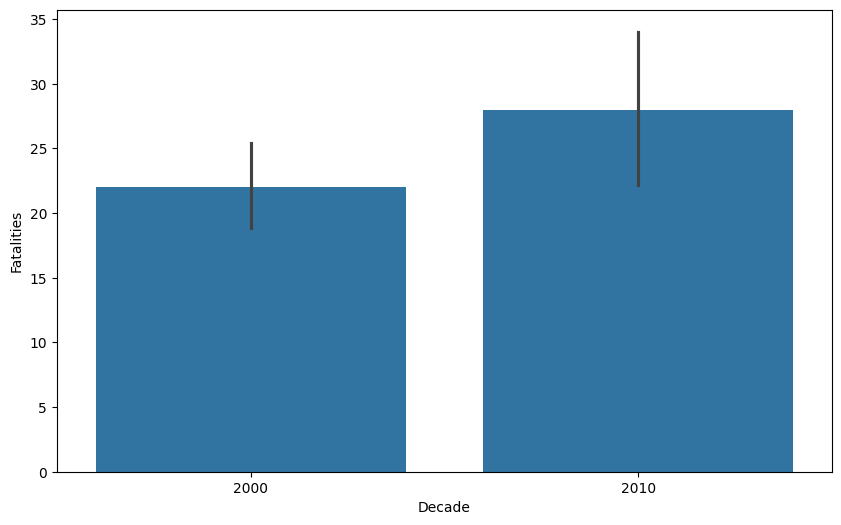

In [99]:
survivors = df.loc[(df['Decade'] == 2000) | (df['Decade'] == 2010)]
plt.figure(figsize=(10, 6))
sns.barplot(x='Decade', y='Fatalities', data=survivors)

## Summarizing the findings and insights:

1. Crash Frequency:
- The number of airplane crashes has generally decreased over the last 30 years.
- There might be peaks in certain periods, possibly related to technological advancements, regulatory changes, or global events.

2. Fatalities:
- Similar to crash frequency, the number of fatalities shows a decreasing trend over time.
- This could be attributed to improved safety measures, aircraft design, and emergency response protocols.

3. Survival Rates:
- The overall survival rate, as well as survival rates for crew and passengers, have generally improved over time.
- This aligns with the decreasing trend in fatalities and highlights the positive impact of safety advancements.

4. Hypothesis Test:
- The hypothesis test comparing survival rates in the 2000s and 2010s revealed no statistically significant differences.
- This suggests that the safety improvements have continued to have a positive impact in recent decades.

Overall, the analysis indicates a positive trend in aviation safety, with decreasing crash frequency, fatalities, and improving survival rates. However, continuous efforts in safety regulations, technology, and training remain crucial to maintain and further enhance aviation safety.
